# Introduction to the Temporal Barcode Dataset
When cortical neurons are injected with white noise current in a slice, the elicited spike
times are highly reproducible (Mainen and Sejnowski, 1995). Visual neurons also respond to white
noise flicker visual stimuli with high temporal precision, for example in retinal ganglion cells
(Fig1A), LGN (Fig1B), or cortical area MT (Fig1C), to name just a few. Similar results are
reported in other sensory modalities (e.g. Kayser et al, 2010; Jarocka et al, 2021). When such
stimuli are presented repeatedly and the neural responses displayed as spike rasters (Figure 1)
the rasters look remarkably like UPC codes or bar codes. The Temporal Barcode Dataset provides
these barcodes for visually responsive neurons throughout the brain of an awake mouse.

![barcoding_fig1.png](../../data/images/barcoding_fig1.png)

*Figure 1. White noise stimuli evoke temporally precise neural responses. A. Recording of a salamander retinal ganglion cell in a dish in response to repeated white noise full-field flicker (from Berry and Meister 1998). See also: Pillow et al 2005, B. Recording of an anesthetized cat LGN cell in response to repeated white noise fullfield flicker (from Reinagel and Reid, 2000). C. Response of an alert macaque cortical area MT neuron in response to a grating stimulus whose drift direction was modulated with repeated white noise (from Buracas et al, 1998).*

Astonishingly, the same bar-code-like patterns have been found in neurons recorded in different individual animals (Fig 2A), and even neurons in different species (Fig 2B). The temporal pattern of one neuron’s response to the same visual stimulus sequence at different contrasts are systematically related (Fig 2C), as are responses of the same neuron to the same visual stimulus sequence at different luminance (Lewen et al., 2001). These findings have implications for dynamical models of neural spike coding (Fellous et al, 2004, Wang et al 2019). We speculated that these barcodes could be used as identifiers of discrete cell types.

![barcoding_fig2.png](../../data/images/barcoding_fig2.png)

*Figure 2. Temporal barcodes define reproducible and stable types. A. Recording of LGN cells in two different anesthetized cats in response to the same repeated white noise full-field flicker (from Reinagel and Reid, 2002). B. Recordings from a salamander retinal ganglion cell vs. a rabbit retinal ganglion cell in response to the same repeated white noise full-field flicker (from Berry et al, 1997). C. recording of a cat LGN cell to the same repeated white noise full-field flicker shown at different contrasts (from Gaudry and Reinagel, 2007).*

This experiment used the OpenScope Neuropixels passive viewing protocol, and displayed visual stimuli modulated in time by a short, repeated white noise sequence. The visual stimulus was either a spatially uniform field whose luminance was modulated in time (Full Field Flicker), or a standing sinusoidal grating whose contrast was modulated in time (Static Gratings). The best evidence for temporal barcodes has come from early visual areas (retina and LGN). Therefore, to obtain large populations of neurons in subcortical areas, roughly half of the mice were recorded in a novel electrode configuration. To our surprise, a majority of neurons in visual cortical areas responded to full field flicker with clear temporal barcodes.

In [1]:
import warnings
warnings.filterwarnings('ignore')

try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

In [2]:
import os
import numpy as np            # various numerical utilities
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
from math import floor, ceil

### The Experiment
Shown in the metadata table below, Openscope's Temporal Barcoding Experiment has produced several mice. This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).

In [3]:
session_files = pd.read_csv("../../data/barcoding_sessions.csv")
session_files

,Unnamed: 0,identifier,size,path,session_time,sub_name,sub_sex,sub_age,sub_genotype,probes,stim types,#_units,session_length
0,0,c3bbf094-904e-43b7-83d5-be5a8bf3826f,2828829044,sub-699241/sub-699241_ses-1318772854_ogen.nwb,2023-12-19 00:00:00-08:00,699241,M,124.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2299,7251.236727
1,1,ad5f1431-2119-4e85-b98e-0a89d5c6fd08,2992502541,sub-699846/sub-699846_ses-1314466742_ogen.nwb,2023-11-30 00:00:00-08:00,699846,M,100.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2771,7248.796817
2,2,26c15f00-af2c-4cc3-97a2-ab32dbe998ae,4721689639,sub-698259/sub-698259_ses-1314229564_ogen.nwb,2023-11-29 00:00:00-08:00,698259,M,111.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2744,12104.177757
3,3,9f6591b5-22b5-4a23-8009-d9cfba9fe525,3058306362,sub-692990/sub-692990_ses-1310924284_ogen.nwb,2023-11-14 00:00:00-08:00,692990,F,129.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",3338,7248.085747
4,4,cbc9402d-64ff-4a8f-a688-add16d7b984c,2973901434,sub-697302/sub-697302_ses-1309845146_ogen.nwb,2023-11-09 00:00:00-08:00,697302,F,97.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2824,7248.555437
5,5,ae100c59-59ce-4f46-b4be-0d68ea357372,3077972048,sub-697303/sub-697303_ses-1309536438_ogen.nwb,2023-11-08 00:00:00-08:00,697303,F,96.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",3465,7254.287277
6,6,e367b37d-c854-45ba-bdae-602df4614dea,3157021325,sub-692360/sub-692360_ses-1301730660_ogen.nwb,2023-10-05 00:00:00-07:00,692360,M,94.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2844,7250.575147
7,7,0e172dc4-eeb4-408d-946f-c80d83cce34a,2739385785,sub-692991/sub-692991_ses-1308221984_ogen.nwb,2023-11-02 00:00:00-07:00,692991,F,117.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2529,7248.935487
8,8,518fffd6-6ad2-4021-89eb-c0bb1767d541,2978882451,sub-692984/sub-692984_ses-1303229472_ogen.nwb,2023-10-12 00:00:00-07:00,692984,M,96.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2892,7249.644247
9,9,96786f67-a6ac-44dc-ba58-61317082fff3,2555712145,sub-685263/sub-685263_ses-1292234897_ogen.nwb,2023-08-23 00:00:00-07:00,685263,M,95.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeA', 'OptogeneticStimulusDevice', 'probe...","{'static_block_presentations', 'receptive_fiel...",2791,7248.094377


In [4]:
m_count = len(session_files["sub_sex"][session_files["sub_sex"] == "M"])
f_count = len(session_files["sub_sex"][session_files["sub_sex"] == "F"])
sst_count = len(session_files[session_files["sub_genotype"].str.count("Sst") >= 1])
pval_count = len(session_files[session_files["sub_genotype"].str.count("Pval") >= 1])
wt_count = len(session_files[session_files["sub_genotype"].str.count("wt/wt") >= 1])

print("Dandiset Overview:")
print(len(session_files), "files")
print(len(set(session_files["sub_name"])), "subjects", m_count, "males,", f_count, "females")
print(sst_count, "sst,", pval_count, "pval,", wt_count, "wt")

Dandiset Overview:
14 files
14 subjects 9 males, 5 females
8 sst, 6 pval, 0 wt


### Downloading Ecephys File
Change the values below to download the file you’re interested in. The `dandiset_id` for this project is `000563` . Set `dandi_filepath` to correspond to the dandiset id and filepath of the file you want.

In [5]:
dandiset_id = "000563"
dandi_filepath = "sub-692990/sub-692990_ses-1310924284_ogen.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [6]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.67.1) of dandi/dandi-cli is available. You are using 0.61.2


File already exists
Opening file


### Showing Probe Tracks
One of the electrode configurations we used was novel to this dataset, designed to maximize the yield of visual units in the dorsolateral geniculate nucleus (LGN, aka LGd) and the superior colliculus (SC).  These are the  main retino-recipient subcortical areas that provide visual input to image-forming streams of visual processing in mice and other mammals.  Here we visualize an example of the novel electrode configuration.

The images below were rendered using the [Visualizing Neuropixels Probe Locations](../visualization/visualize_neuropixels_probes.ipynb) notebook. The probes are using the [Common Coordinate Framework](https://community.brain-map.org/t/allen-mouse-ccf-accessing-and-using-related-data-and-tools/359) (CCF). The experiment uses six probes labeled A-F to target various regions. Note that any warping is do to the spatial adjustment from the subject brain to the rendered model brain.

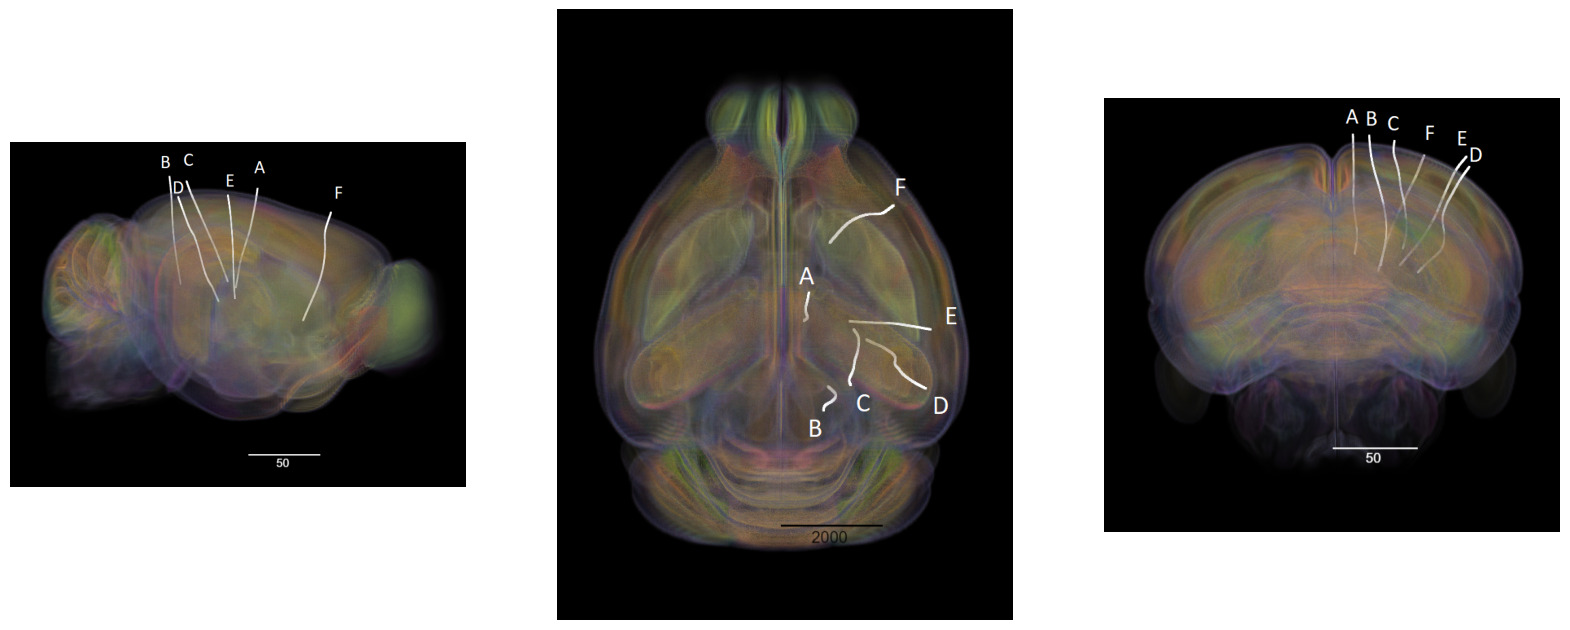

In [7]:
sagittal_view = Image.open("../../data/images/barcoding_probes_sagittal.png")
dorsal_view = Image.open("../../data/images/barcoding_probes_dorsal.png")
transverse_view = Image.open("../../data/images/barcoding_probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)
for ax in axes:
    ax.axis("off")

### Find out about the units recorded in the experiment
Below, the `Units` table is retrieved from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit. For more information on the various unit metrics, see [Visualizing Unit Quality Metrics](../visualization/visualize_unit_metrics.ipynb). From this table, the Units used in this notebook are selected if they have 'good' quality rather than 'noise', and if they had relatively few interspike interval violations (this selects for units that are well isolated single neurons).

In [8]:
# Helper function to find the brain location of each unit
def getUnitsLocation(nwb):
    """
   
    INPUTS:
      nwb      an nwb object
    OUTPUTS:
      unit_locations  List of the assigned brain locations of all units in the units table
    """
    units=nwb.units
    units_peak_channel_id = list(units.peak_channel_id)
    n_units=len(units_peak_channel_id)
    electrodes = nwb.electrodes  
    channelLocations=list(electrodes.location) # anatomic locations of each channel
    channelIDs =list(electrodes.id)  # the id for that channel
    unit_locations=np.zeros((n_units,)).astype(str)
    for i in range(n_units):
        #find the brain region closest to the channel which has the peak value for that unit
        unit_locations[i]=channelLocations[channelIDs.index(units_peak_channel_id[i])] 
    return unit_locations

In [9]:
# Load the unit information needed for the anlaysis
units = nwb.units          # extract spike times from the Units Data table 
units_spike_times = units["spike_times"] # pull out the `spike_times` attribute to be used later
n_units = len(units_spike_times)
print('Number of units: ',n_units)

# example of unit properties one might use to filter the units
units_quality = list(units["quality"]) # quality metric of each unit - list of strings
units_isiviol = list(units["isi_violations"]) # isi violation metric or each unit - list of floats

# make a list with indexes of selected units
goodUnits=[]
for i in range(len(units_quality)):
    if units_quality[i]=='good' and units_isiviol[i]<1:
        goodUnits.append(i)
        
print('of which ', len(goodUnits), 'qualify for inclusion')

#retrieve the anatomical locations assigned to the units
units_location = getUnitsLocation(nwb)
print('The selected units were found in: ')
np.unique(units_location[goodUnits])

Number of units:  3338
of which  2163 qualify for inclusion
The selected units were found in: 


array(['CA1', 'CA2', 'CA3', 'CP', 'DG-mo', 'DG-po', 'DG-sg', 'IGL',
       'LGd-co', 'LGd-ip', 'LGd-sh', 'LH', 'LP', 'MOp1', 'MOp2/3', 'MOp5',
       'MOp6a', 'RSPagl2/3', 'RSPagl5', 'RSPagl6a', 'RSPd2/3', 'RSPd5',
       'RSPd6a', 'RSPv1', 'RSPv2/3', 'RSPv5', 'RSPv6a', 'RSPv6b', 'RT',
       'SCig', 'SCiw', 'SCop', 'SCsg', 'SCzo', 'SSp-bfd2/3', 'SSp-bfd4',
       'SSp-bfd5', 'SSp-bfd6a', 'TH', 'VISal2/3', 'VISal4', 'VISal5',
       'VISal6a', 'VISal6b', 'VISpm1', 'VISpm2/3', 'VISpm4', 'VISpm5',
       'VISpm6a', 'VPL', 'VPM', 'root'], dtype='<U32')

### Loading Stimulus Times

In [10]:
# Find out what stimulus conditions were used in the experiment
# See bottom of this notebook for more about the timeline of the entire experiment
StimulusTypes=list(nwb.intervals.keys())
StimulusTypes

['RepeatFFF_presentations',
 'UniqueFFF_presentations',
 'invalid_times',
 'receptive_field_block_presentations',
 'static_block_presentations']

In [11]:
# The full field flicker stimulus was sufficient to observe a barcode in all units that had barcodes,
# and is the easiest to interpret because all neurons had the identical stimulus in their receptive fields 
stimTypeToExtract='RepeatFFF_presentations'
# Information about the stimulus
stim_table = nwb.intervals[stimTypeToExtract]    
stim_table

,start_time,stop_time,stimulus_name,stimulus_block,index_repeat,contrast,mask,opacity,orientation,phase,spatial_frequency,size,units,stimulus_index,color,tags,timeseries
id,,,,,,,,,,,,,,,,,
0,161.81776,161.83444,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7200, 1, timestamps pynwb.base.TimeSeries at 0x2031458284208\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
1,161.83444,161.85113,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7201, 1, timestamps pynwb.base.TimeSeries at 0x2031458284208\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
2,161.85113,161.86781,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(7202, 1, timestamps pynwb.base.TimeSeries at 0x2031458284208\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
3,161.86781,161.88448,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(7203, 1, timestamps pynwb.base.TimeSeries at 0x2031458284208\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"


In [12]:
# pull out some stimulus details we will need for our analysis
StimIndexList=np.unique(np.array((stim_table["stimulus_index"])) )  # array of stimulus conditions 
IndexRepeatList=np.unique(np.array((stim_table["index_repeat"]))) # array of repeat numbers within the block 
StimNameList=set(stim_table["stimulus_name"])
nPresentations=len(StimIndexList); # determine number of instances from the data
# determine nRepeats from the data
nRepeats=len(IndexRepeatList)
print(stimTypeToExtract,' was repeated ',nRepeats,' times')

RepeatFFF_presentations  was repeated  90  times


### Getting Trial-Aligned Event Times

In [13]:
# Find the start times of the repeated stimulus
# cast the index_repeat and stim_index columns from  hdmf.common.table.VectorData into arrays
index_repeat=np.array(stim_table["index_repeat"])  
stim_index=np.array(stim_table["stimulus_index"])
# note that the repeats are not necessarily back to back so the duration is determined by 
# the end time of the same repeat, not the start time of the next repeat
stim_times=np.zeros(nRepeats*nPresentations)
endtime=np.zeros(nRepeats*nPresentations)
for k in range(nPresentations): #loop over presentations of this stimulus
    mask1=stim_index==StimIndexList[k] #true for all elements in this presentation
    for j in range(nRepeats):   #loop over repeats within the presentation
        mask2=index_repeat==j #true for all elements with this repeat number
        ind1=np.where(np.logical_and(mask1,mask2))[0][0] # index of first element meeting conditions
        stim_times[k*nRepeats+j]= stim_table["start_time"][ind1]

        ind2=np.where(np.logical_and(mask1,mask2))[0][-1]  # index of last element meeting conditions
        endtime[k*nRepeats+j]= stim_table["stop_time"][ind2]

# the actual duration of each repeat is given by end_time-start_time
# average these to get the nominal duration for all trials, for further analysis
eachduration=endtime-stim_times # the values should be close to identical (check this)
trial_duration=np.mean(eachduration) # then set the "duration" variable to the mean duration 
trial_duration=np.round(trial_duration*1000)/1000  #truncated to three significant digits

totalStimTime=trial_duration*nRepeats # time in seconds total over all repeats

In [14]:
#  makeAlignedEvents:  a helper function that extracts and aligns spike times for one unit
def makeAlignedEvents(spike_times,stim_times,duration:float):
    """
    INPUTS:
    spike_times     array of spike times of a single unit, in seconds
    stim_times      array of start times of a repeated stimulus, in seconds
    duration        duration of the repeated stimulus, in seconds
    
    OUTPUTS:
    events          1D array whose elements are all times when a spike is seen in a repeat relative to the start of repeat
  
    """
    nRepeats=len(stim_times) #number of stim_time entries would give us the number of repeats for that stimulus
    events=np.zeros((nRepeats,)).tolist()
    
    for stim_idx, stim_time in enumerate(stim_times): 
        first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [stim_time, stim_time+duration])
        spike_times_in_range = np.array(spike_times[first_spike_in_range:last_spike_in_range])  
        spike_times_in_range=spike_times_in_range-stim_time #set trial start as time 0 
        events[stim_idx]=spike_times_in_range.tolist()

    return events

In [15]:
# Choose example units to illustrate the barcode analysis methods
# These examples were chosen to illustrate two different barcodes and a neuron without a barcode
# in the sections below
example_indices = [652, 1109, 0]  

# Extract the aligned spike times of the example neurons
rasters=[] # the aligned spike times
FR =[]     # firing rate  
for i in range(len(example_indices)):
    rasters.append( makeAlignedEvents(units_spike_times[example_indices[i]],stim_times,trial_duration) )
    # count spikes in all the repeats to estimate the firing rate
    nspk=0 
    for j in range(nRepeats):
        nspk += len(rasters[i][j])
    FR.append(nspk/totalStimTime) 
    # print summary information about the examples
    print('example', i+1, 'is unit',example_indices[i],', recorded from ', units_location[example_indices[i]], ', FR=',np.round(FR[i],1),' spk/sec')

example 1 is unit 652 , recorded from  SCop , FR= 17.8  spk/sec
example 2 is unit 1109 , recorded from  LGd-co , FR= 11.8  spk/sec
example 3 is unit 0 , recorded from  LH , FR= 8.6  spk/sec


### Plotting rasters
To visualize the responses of neurons we can plot the times of spikes relative to the stimulus onset time, from the trial spike trains that were just computed. In a spike raster plot, the x axis is time in seconds, the y axis is repeat number, and each dot is the time of one spike. When spikes appear at the same time in every trial, we see a vertical stripe in the raster. Units that have such vertical stripes look like "barcodes", hence the name of this project.

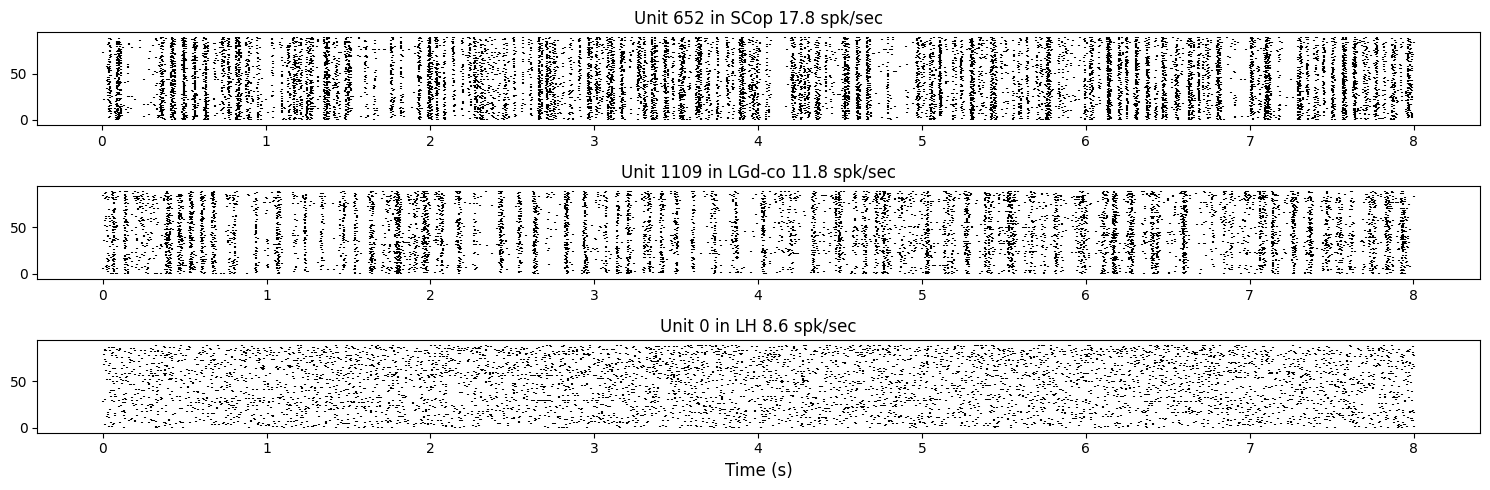

In [16]:
#show rasters for three example cells
fig, axes = plt.subplots(3, 1, figsize=(15, 5))  # 1 row, 3 columns
for i in range(3):
    axes[i].eventplot(rasters[i], colors='black')
    title = "Unit %d in %s %.1f spk/sec" % (example_indices[i], units_location[example_indices[i]],FR[i])
    axes[i].set_title(title)

plt.xlabel("Time (s)", fontsize=12) 
plt.tight_layout()
plt.show()

### Plotting PSTHs 
The Barcode of the cell is defined as the times of these precisely aligned firing events
One way to extract those times is to find the peaks in the peri-stimulus time histogram (PSTH).

In [17]:
# compute_psth: helper function to compute PSTH by assigning spike times to time bins
def compute_psth(spike_trains, total_duration, bin_duration):
    n_bins = int(total_duration / bin_duration)
    psth = np.zeros(n_bins, dtype=float)
    for train in spike_trains:
        binned_spikes = np.floor(np.array(train) / bin_duration).astype(int)
        valid_bins = binned_spikes[binned_spikes < n_bins]
        psth[valid_bins] += 1
    psth /= len(spike_trains)
    return psth 

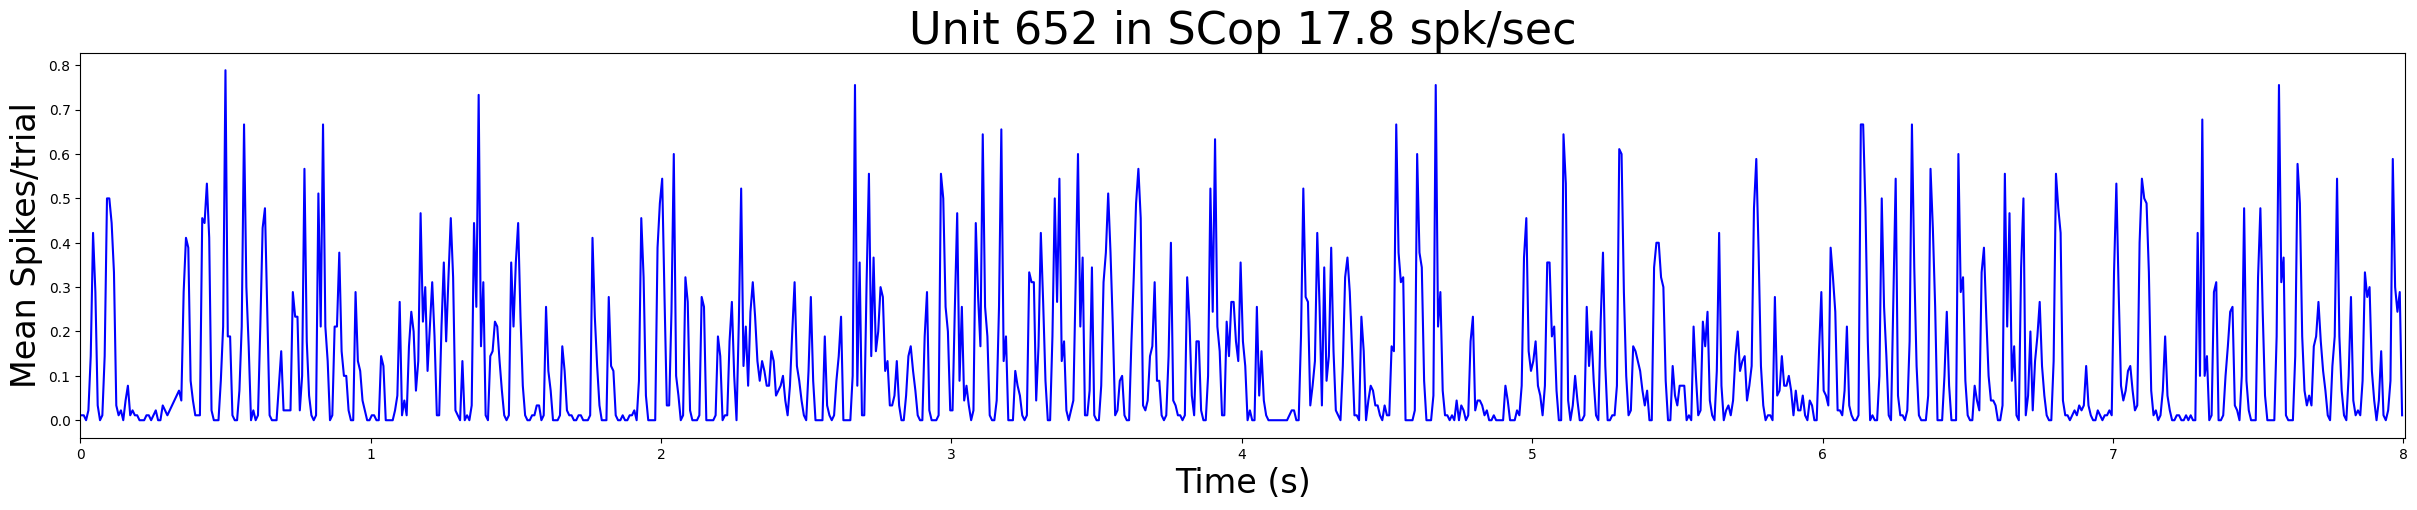

In [18]:
# Plot the psth of one of the example neurons 
example=0  # first example neuron
bin_duration = 0.008 # Time bin to use in seconds 
psth1=compute_psth(rasters[example], trial_duration, bin_duration)
n_bins = len(psth1)
bin_midpoints = (np.arange(n_bins) + 0.5) * bin_duration
fig, ax = plt.subplots(figsize=(30, 5))
plt.plot(bin_midpoints, psth1, color='blue')
plt.xlabel('Time (s)',fontsize=24)
plt.ylabel('Mean Spikes/trial',fontsize=24)
title = "Unit %d in %s %.1f spk/sec" % (example_indices[example], units_location[example_indices[example]],FR[example])
plt.title(title,fontsize=32)
plt.xlim([0,trial_duration])
plt.show()

## Statistical criterion for PSTH peaks
- The "bars" of the barcode (as seen in rasters) correspond to peaks in the PSTH.
- We set a cutoff for the minimum number of spikes observed in a timebin across repeats
   to qualify as a psth peak or "bar", such that a peak would be found <5% of the time
   if the response were generated by an inhomogeneous Poisson process with the
   same firing rate as the neuron. 

In [19]:
# getSpikeCountThreshold: helper function to determine the number of spikes in psth bin expected by chance
def getSpikeCountThreshold(rate, M, N, alpha, doplot=False):
    """
    Returns criterion spike-count thresholds (high and low) for detecting
    significantly above- or below-chance spike counts in any one time bin
    of a raster, under a Poisson null hypothesis.

    Parameters
    ----------
    rate : float
        Mean spikes per bin in the data raster overall
    M : int
        Number of trials in the data raster
    N : int
        Number of time bins in the data raster
    alpha : float
        Acceptable fraction of false positives (e.g., 0.05)
    doplot : bool, optional
        If True, plot the PDF and thresholds (default False)

    Returns
    -------
    highThresh : int
        Minimum spike count significantly above chance (Bonferroni-corrected)
    lowThresh : int
        Maximum spike count significantly below chance, or -1 if none
    """
    # Bonferroni correction for multiple comparisons
    adj_alpha = alpha / N
    
    # Find low threshold
    Clow = 0
    while poisson.pmf(Clow, rate * M) < adj_alpha:
        Clow += 1
    lowThresh = Clow - 1  # If Clow never increments, this becomes -1

    # Find high threshold, starting from Clow
    Chigh = Clow
    while poisson.pmf(Chigh, rate * M) > adj_alpha:
        Chigh += 1
    highThresh = Chigh

    # Optional plotting
    if doplot:
        C = np.arange(0, Chigh + 1)
        P = poisson.pmf(C, rate * M)
        plt.figure()
        plt.semilogy(C, P, 'o-')
        plt.xlabel(f'Spike count over M={M} trials')
        plt.ylabel('Probability on Poisson Null')
        plt.title(f'For Mean {rate:.3f} spikes/bin, N={N} timebins')
        plt.axhline(y=adj_alpha, color='r', linestyle='-')
        plt.text(Chigh, adj_alpha, f' α={alpha:.2f}', color='r')
        plt.text(Chigh / 2, 3 * adj_alpha, 'nonsignificant',
                 ha='center', color='r')
        plt.text(Chigh / 2, adj_alpha / 3, 'significant',
                 ha='center', color='r')
        plt.xticks() # to be coded: force xticks to be integers
        plt.show()

    return highThresh, lowThresh


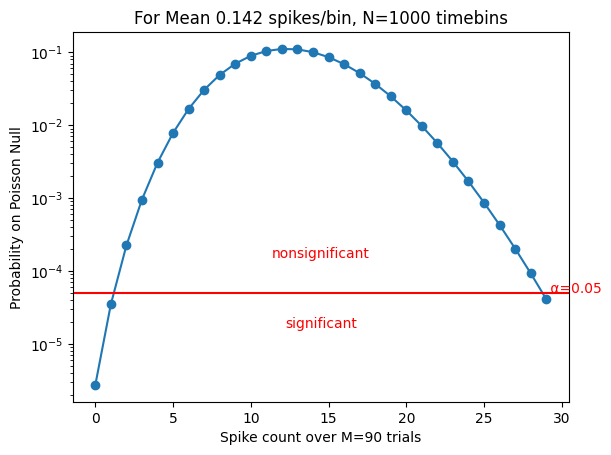

Time bins with >= 29  spikes over the  90  repeats qualify as bars


In [20]:
# Compute the threshold criterion for a sample neuron (same example selected above)
alpha=0.05 # a significance criterion
rate=FR[example]*bin_duration # rate in spikes per time bin
highThresh, lowThresh = getSpikeCountThreshold(rate, nRepeats, n_bins, alpha, True)
print('Time bins with >=',highThresh,' spikes over the ',nRepeats,' repeats qualify as bars')

## Extracting barcodes
- A stretch of contiguous qualifying time bins are considered part of the same peak  
- The time of the "bar" is defined as the midpointof the time bin(s) comprising the peak

In [21]:
# find_bars: helper function to return the bar code of a spike raster
def find_bars(spike_train, trial_duration, bin_duration,min_spikes):
    '''
    Identifies the times of PSTH peaks as bars of a barcode by a simple algorithm:
    All consecutive time bins above set threshold are considered to be part of the same bar, 
     the mean of those bin midpoints is considered to be the bar time
    INPUTS
        spike_train     raster for a repeated stimulus as a list of aligned spike time lists
        trial_duration  the duration of the repeated stimulus 
        bin_duration    bin size to use for the psth
        min_spikes      minimum integer number of spikes in a bin (summed over repeats)
                        for inclusion in peak identification
    OUTPUTS
        bars            times of the barcode bars in s relative to stimulus onset
        psth            the psth curve as mean number of spikes in bin per trial
        bin_midpoints   time axis for the psth
    '''
    nRepeats=len(spike_train) # number of repeats in raster
    psth=compute_psth(spike_train, trial_duration, bin_duration) # mean number of spikes in bin per trial
    significant_array = psth*nRepeats >=  min_spikes # convert psth to integer spike count to compare to minspikes
    significant_indices = np.where(significant_array)[0] #indexes to qualifying time bins
    n_bins = len(psth) 
    bin_midpoints = (np.arange(n_bins) + 0.5) * bin_duration

    # Consecutive qualifying time bins are considered part of the same "Bar"
    # The time of that bar is considered to be the mean of those bin centers
    bars = []
    current_group = []
    for idx in significant_indices:
        if not current_group or idx == current_group[-1] + 1:
            current_group.append(idx)
        else:
            bars.append(np.mean(bin_midpoints[current_group]))
            current_group = [idx]
    if current_group:
        bars.append(np.mean(bin_midpoints[current_group]))

    return bars,psth, bin_midpoints

In [22]:
# plotPSTHbarcode: helper function to plot PSTH and illustrate how bar times are derived
def plotPSTHbarcode(psth, bin_midpoints, threshold, bars, xlim =[0, 1],title='PSTH and Barcode'):
    '''
    Visualization of barcode extraction from psth
    Plots the psth, threshold, and identified peak midpoints
    INPUTS
        psth           psth expressed as mean spikes in bin over repeats
        bin_midpoints  time axis for the psth
        threshold      threshold expressed as mean spikes in bin over repeats
        bars           times of identified bars
        xlim           optional axis limits
        title          optional figure title
    '''
    fs=24 # font size
    fig, ax = plt.subplots(figsize=(30, 5))
    plt.plot(bin_midpoints, psth,  label='PSTH',color='blue')
    plt.xlabel('Time (s)',fontsize=fs)
    plt.ylabel('Mean Spike Count',fontsize=fs)
    plt.title(title,fontsize=1.5*fs)
    plt.xlim(xlim)

    # Plot threshold in red, points exceeding threshold in green
    plt.plot(bin_midpoints, threshold*np.ones_like(bin_midpoints), label='Threshold', color='red')   

    significant_array = psth >= threshold # both are in units of per-trial
    significant_indices = np.where(significant_array)[0] #indexes to qualifying time bins
    plt.scatter(bin_midpoints[significant_indices], psth[significant_indices], color='green')

    #show inferred bar times
    bar_offset = max(psth) * 1.2
    bar_height = max(psth) * 0.1
    for i, bar_x in enumerate(bars):
        plt.plot([bar_x,bar_x], bar_offset+[0,bar_height], color='black', lw=1.5)
    plt.show() 

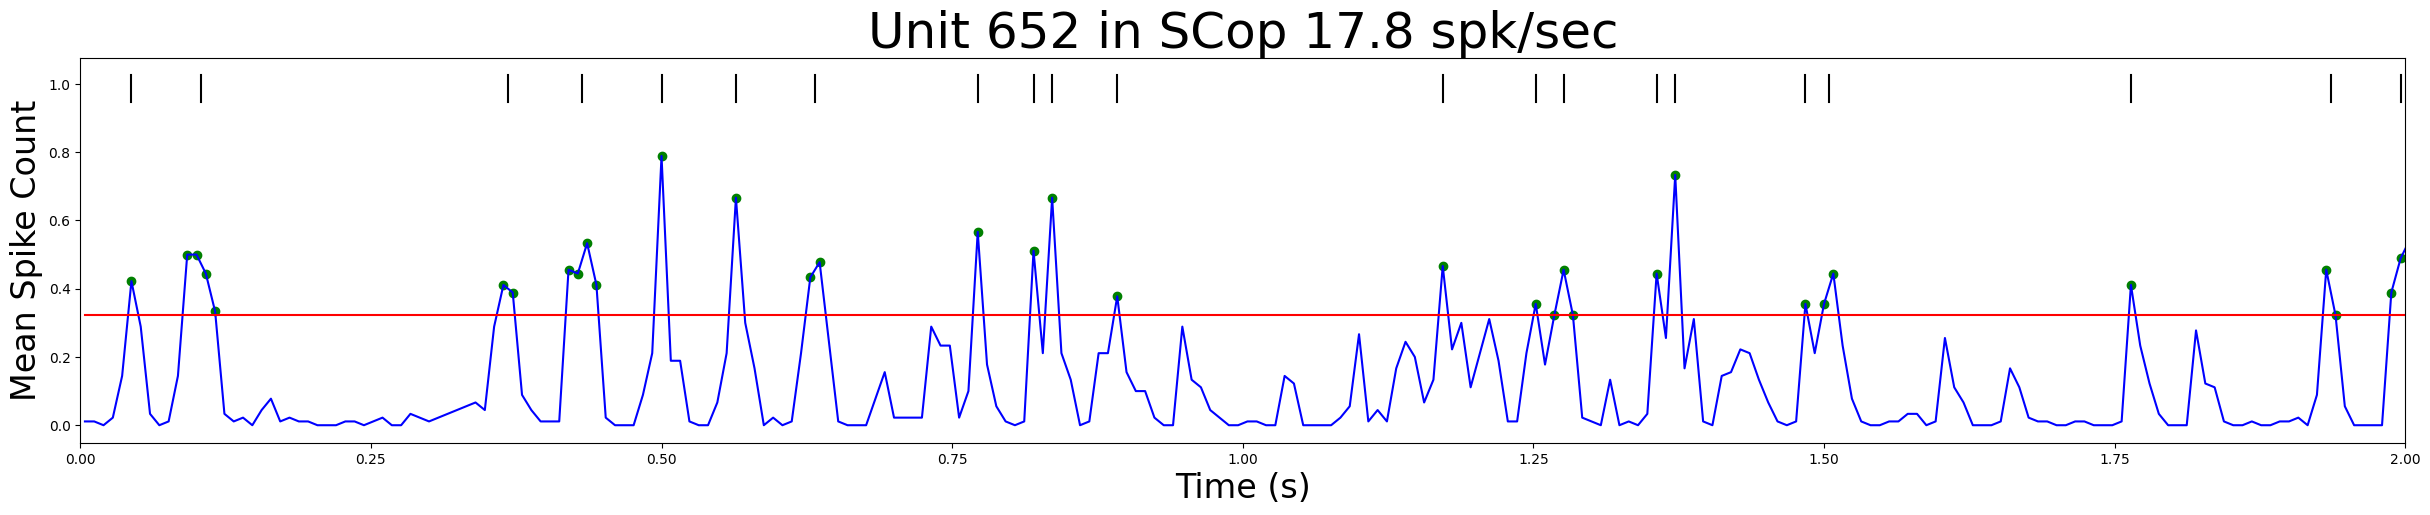

In [23]:
# Extract barcode for the example neuron and visualize it
bars, psth, t= find_bars(rasters[example], trial_duration, bin_duration, highThresh)
xlim=[0,2] # beginning and ending time to show in plot, in s
title = "Unit %d in %s %.1f spk/sec" % (example_indices[example], units_location[example_indices[example]],FR[example])
plotPSTHbarcode(psth, t, highThresh/nRepeats, bars,xlim,title)

In [24]:
# Compute the barcodes of all three example units
barcodes=[]
for i in range(len(example_indices)):
    rate=FR[example]*bin_duration # rate, expressed in spikes per time bin
    highThresh, lowThresh = getSpikeCountThreshold(rate, nRepeats, n_bins, alpha, False)
    bars, psth, t= find_bars(rasters[i], trial_duration, bin_duration, highThresh)
    barcodes.append(bars)
    print('Unit ',example_indices[i],' has ', len(bars), ' bars in its barcode')

Unit  652  has  89  bars in its barcode
Unit  1109  has  52  bars in its barcode
Unit  0  has  0  bars in its barcode


## 5. Spike Distance Metric

One way to quantify the similarity between two bar codes is an **edit distance** 
(the same principle used to align and compare genetic sequences)
 
The **spike distance metric** measures the minimum number of operations to transform one spike train into another.
There are three legal operations:

1. **Deleting a Spike**  
   - Remove a spike from one train if it doesn’t match any spike in the other train.

2. **Adding a Spike** 
   - Insert a spike into a train to align it with the other train.

3. **Shifting a Spike** (Cost depends on how far you shift):
   - Adjust the timing of a spike to align it with a spike in the other train.
   - The cost of shifting depends on how far the spike moves, scaled by the `cost` parameter.

Citation: Victor JD, Purpura KP. Nature and precision of temporal coding in visual cortex: a metric-space analysis. J Neurophysiol. 1996;76(2):1310-26. Epub 1996/08/01. doi: 10.1152/jn.1996.76.2.1310.  

In [25]:
# spkd:  helper function implementing a simple algorithm to compute the minimum edit distance  
def spkd(tli, tlj, cost):
    '''
    Determines the minimum number of operations required to convert one bar code into the other 
    where the legal steps are to add a bar, delete a bar, or move a bar over by cost seconds
    INPUTS:
    tli        array of event times in one example, in seconds
    tlj        array of event times in another example, in seconds
    cost       number of seconds you can shift an event for the same cost as deleting or adding a spike
    
    OUTPUTS:
    d          the distance between i and j 
  
    Translated to Python by Siddharth Vyasabattu 2025 from Matlab code by Daniel Reich
    Translated to Matlab by Daniel Reich 1999 from FORTRAN code by Jonathan Victor
    (used with permission from JV)
    
    '''
    nspi = len(tli)
    nspj = len(tlj)

    if cost == 0:
        return abs(nspi - nspj)
    elif cost == float('inf'):
        return nspi + nspj

    # Initialize the cost matrix
    scr = np.zeros((nspi + 1, nspj + 1))

    # Margins with the cost of adding a spike
    scr[:, 0] = np.arange(nspi + 1)
    scr[0, :] = np.arange(nspj + 1)

    # Calculate the costs for aligning spike trains
    if nspi > 0 and nspj > 0:
        for i in range(1, nspi + 1):
            for j in range(1, nspj + 1):
                scr[i, j] = min(
                    scr[i - 1, j] + 1,
                    scr[i, j - 1] + 1,
                    scr[i - 1, j - 1] + cost * abs(tli[i - 1] - tlj[j - 1])
                )
    d = scr[nspi, nspj]  #the distance metric
    return d


### Computing Distances Between Barcodes
#### To illustrate the spike distance metric let's compare two fictional barcodes

In [26]:
Barcode_A = [2, 3, 7]     #times of the bars, in s
Barcode_B =[2.1, 5, 7.2]  
Barcode_A, Barcode_B

([2, 3, 7], [2.1, 5, 7.2])

In [27]:
cost = 1 # cost per 1s shift in a spike time
spkd(Barcode_A, Barcode_B, cost)

2.3000000000000003

Optional Exercises
- Modify the cost parameter to see how the distance changes. 
- Try computing the distance by hand using the algorithm above
- Is the distance from Barcode_A to Barcode_B the same as from Barcode_B to Barcode_A?

#### Now compute the distance between the barcodes of the two example neurons above that had barcodes

In [28]:
# recall the bar code lengths
for i in range(2):
    print('Unit ',example_indices[i],' has ', len(barcodes[i]), ' bars in its barcode')
    
print('Worst case, deleting all the bars of the first and inserting all the bars of the second')
print('would cost ',len(barcodes[0]),' + ',len(barcodes[1]),' = ',len(barcodes[0])+len(barcodes[1]))

# choose a cost parameter
cost=125
# two spikes will be aligned if it is "cheaper" than deleting one and inserting the other
print('cost = ',cost,' means bars will be matched if they are <',2000/cost,' ms apart')

# The distance between the full length barcodes
d=spkd(barcodes[0],barcodes[1], cost)
print('For a cost of ',cost,' the distance is = ',np.round(d,1))

Unit  652  has  89  bars in its barcode
Unit  1109  has  52  bars in its barcode
Worst case, deleting all the bars of the first and inserting all the bars of the second
would cost  89  +  52  =  141
cost =  125  means bars will be matched if they are < 16.0  ms apart
For a cost of  125  the distance is =  139.0


## What does the distance between two barcodes mean?
- Any bar code can be converted to any other bar code for some cost. If they are identical the cost will be 0.
- What cost should we expect on chance if the bar codes are not really related?
- One negative control is to circularly permute one of the two barcodes

### Circular permutation explained
To circularly permute a barcode we apply a random time shift to all the events. 
If an event’s new time exceeds the total duration of the trial, it wraps around to the beginning 
using modular arithmetic.

In [29]:
# To illustrate suppose a barcode had bars at 2, 4 and 7s
examplebarcode=[2,4,7]
print('example bar code = ',examplebarcode)

# and suppose the random offset was 1.5s
offset = 1.5
print('offset = ', offset)

# this adds the offset to each bar's time
for i in range(len(examplebarcode)):
    examplebarcode[i] += offset
print('shifted bar code = ',examplebarcode)
print('stimulus duration = ',trial_duration)

# this wraps the values exceeding the trial duration back to 
# the beginning and sorts them in order again
permutedexample = np.sort( examplebarcode % trial_duration )
print('permuted bar code = ',permutedexample)

example bar code =  [2, 4, 7]
offset =  1.5
shifted bar code =  [3.5, 5.5, 8.5]
stimulus duration =  8.007
permuted bar code =  [0.493 3.5   5.5  ]


In [30]:
# permute_barcode: helper function to permute barcodes
def permute_barcode(barcode,trial_duration):
    random_offset = np.random.uniform(0, trial_duration)
    for i in range(len(barcode)):
        barcode[i] += random_offset
    permutedcode = np.sort(barcode % trial_duration)
    return permutedcode

- Now let's permute the full length barcode of the first example neuron and compute its distance to the barcode the second neuron as a negative control

In [31]:
permuted_barcode1 = permute_barcode(barcodes[0], trial_duration)
control_d = spkd(permuted_barcode1, barcodes[1], cost)
print('For a shift cost of ',cost)
print('The distance from permuted neuron1 to neuron2 was ',np.round(control_d,1))

For a shift cost of  125
The distance from permuted neuron1 to neuron2 was  126.6


- We can repeat this 1000 times to get a null distribution 

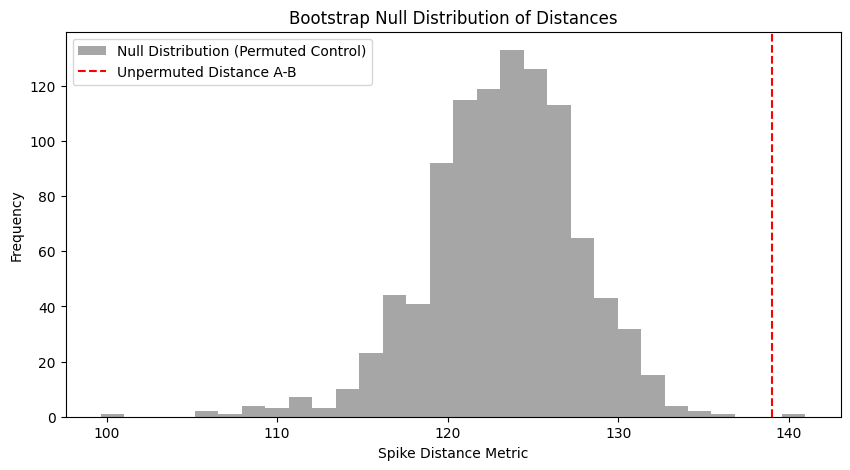

In [32]:
perm_barcode_dist = []
for i in range(1000):
    permuted_barcode1 =  permute_barcode(barcodes[0], trial_duration)
    perm_barcode_dist.append(spkd(permuted_barcode1, barcodes[1], cost))
plt.figure(figsize=(10, 5))
plt.hist(perm_barcode_dist, bins=30, color='gray', alpha=0.7, label="Null Distribution (Permuted Control)")
plt.axvline(x=d, color='red', linestyle='--', label="Unpermuted Distance A-B")
plt.xlabel("Spike Distance Metric")
plt.ylabel("Frequency")
plt.title("Bootstrap Null Distribution of Distances")
plt.legend()
plt.show()

- If the true distance falls near the middle of the null distribution, the two barcodes are no more related than expected on chance 
- If the true distance is very **small** compared to the null distribution, the barcodes are significantly similar
- If the true distance is very **large** compared to the null distribution,  the barcodes are significantly opposed (e.g. an ON vs OFF cell)
- By comparing the distances between the barcodes of all units, we can cluster or **classify** neurons according to their barcodes

## Exercises for the reader
- You could try different cost parameters. The higher the cost, the more the distance reflects precise temporal alignment of the barcodes. The lower the cost, the more it reflects the difference in firing rates 
- You could try different example units, perhaps exploring different visual areas.
- Above we hand-coded the bin size to use for the PSTHs, but you could try a different choice. The best choice can be derived in a principled way for each unit, for example based on the autocorrelation of the PSTH. 
- You could condition on other columns the units table to select units based on different inclusion criteria
- You could try different distance metrics -- there are many

## Other things you can find in this dataset
- We used two different electrode configurations; in half the mice we prioritized targeting of subcortical visual areas; the other half prioritized targeting cortical visual areas. This dataset has more dLGN and SC neurons than any previous Allen Institute dataset
- The stimulus table variable 'color' contains the luminance of the visual stimulus in each video frame 
- We also presented a longer 120s unique full field white noise sequence
- We also presented standing sine gratings modulated by white noise in time, in order to drive units that might not respond to spatially uniform stimuli. Spatial frequency, phase and orientation were varied.
- There are flashed gabor stimuli which can be used to map the receptive field locations
- Running speed and pupil dilation data could be used to test for modulatory effects on barcodes
- Optotagging data can be used to identify units in one molecularly defined cell type per mouse


# Session Timeline
To get a good idea of the temporal structure of the stimulus throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that there is a period of random full field flashes, followed by repeated full field flashes and more random flashes. Then static block presentations and receptive field presentations. Finally, there is an optogenetic stimulation period.

In [33]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [34]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# manually add optotagging epoch since the table is stored separately
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

6
('UniqueFFF_presentations', 0.0, 41.70058, 161.81776)
('RepeatFFF_presentations', 1.0, 161.81776, 882.43771)
('UniqueFFF_presentations', 2.0, 882.43771, 1002.53826)
('static_block_presentations', 3.0, 1002.53826, 6767.68327)
('receptive_field_block_presentations', 4.0, 6767.68327, 7248.085746666667)
('optogenetic_stimulation', 1.0, 7267.91448, 8138.04606)


In [35]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

41 8139


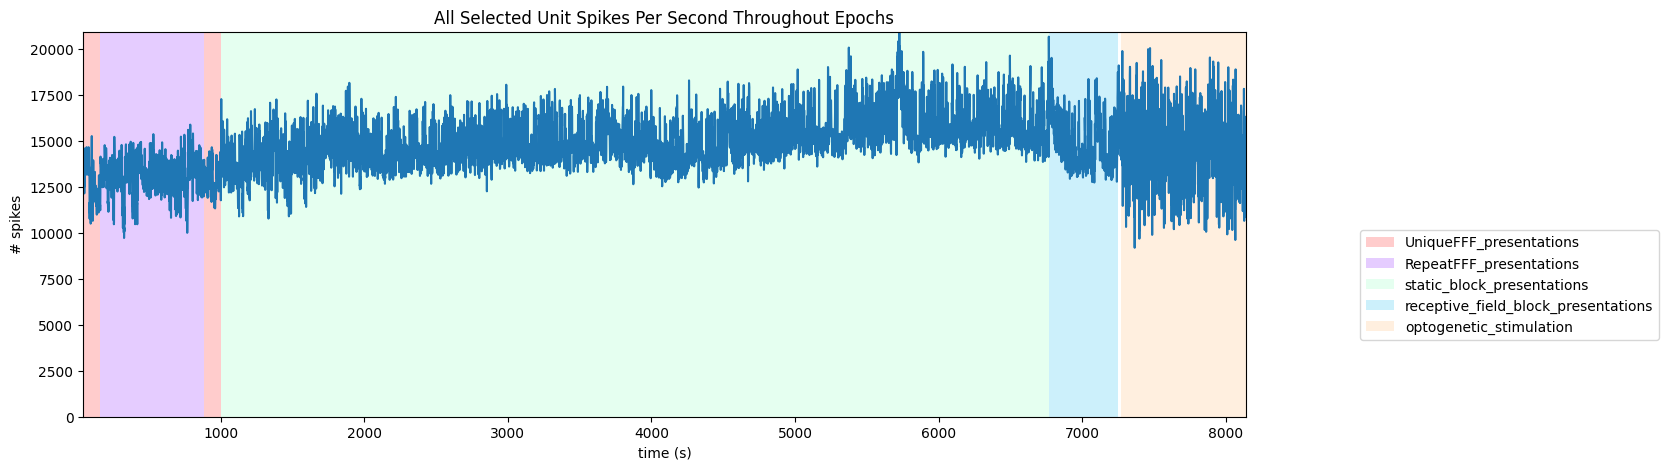

In [36]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec

ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Selected Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.18, 0.25))
ax.plot(bins[:-1], hist)

# Visualizing Receptive Fields
Very few SC units have been previously described in the Allen Institute datasets. 
Here we visualize the receptive fields of some SC units in this dataset.
Note that due to limited recprding time, the receptive field stimuli were shown 
for a very limited time, and therefore many RF maps are noisy.

The following code is taken from the [Showing Receptive Fields](../first-order/receptive_fields.ipynb) notebook and is explained in more detail there.

In [37]:
# make a list with indexes of units mapped to an area 
areasToInclude=['SCsg'] #  ['SCig', 'SCiw', 'SCop', 'SCsg']
RFunits=[]
for i in range(len(units_quality)):
    if units_location[i] in areasToInclude and units_quality[i] == "good":
        RFunits.append(i)
        
print('Found ', len(RFunits), 'units mapped to ', areasToInclude)

Found  37 units mapped to  ['SCsg']


In [38]:
### get receptive field of a unit using its spike times and the stim table
rf_stim_table = nwb.intervals["receptive_field_block_presentations"]
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]

In [39]:
# helper function to extract one unit's firing rate as a function of gabor location
def get_rf(spike_times,rf_stim_table):
    # INPUT
    #  spike_times: the spike times of one unit
    #
    onset_delay = 0.2
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            # stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for i in range(len(rf_stim_table)):
                if rf_stim_table['x_position'][i] != x or rf_stim_table['y_position'][i] != y:
                    continue
                start, end = rf_stim_table['start_time'][i], rf_stim_table['stop_time'][i]
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [start+onset_delay, end+onset_delay])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [40]:
# compute receptive fields of selected units (this can take some time)
rfs = []
for unit_idx in RFunits: 
    unit_spike_times = nwb.units['spike_times'][unit_idx]
    rfs.append(get_rf(unit_spike_times,rf_stim_table))


In [41]:
### helper function to display the receptive fields for each unit in a 2D plot

def display_rfs(unit_rfs):
    n_cols = 10
    n_rows = len(unit_rfs)//n_cols
    fig, axes = plt.subplots(n_rows+1, n_cols)
    fig.set_size_inches(12, n_rows+1)

    # handle case where there's <= 10 rfs
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for irf, rf in enumerate(unit_rfs):
        ax_row = int(irf/10)
        ax_col = irf%10
        axes[ax_row][ax_col].imshow(rf, origin="lower")
    for ax in axes.flat[1:]:
        ax.axis('off')

    # making axis labels for first receptive field
    axes[0][0].set_xlabel(field_units)
    axes[0][0].set_ylabel(field_units)
    axes[0][0].xaxis.set_label_position("top") 
    axes[0][0].xaxis.set_ticks_position("top")
    axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
    axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)

    for i, l in enumerate(axes[0][0].xaxis.get_ticklabels()):
        if i % 2 != 0:
            l.set_visible(False)
    for i, l in enumerate(axes[0][0].yaxis.get_ticklabels()):
        if i % 2 != 0:
            l.set_visible(False)

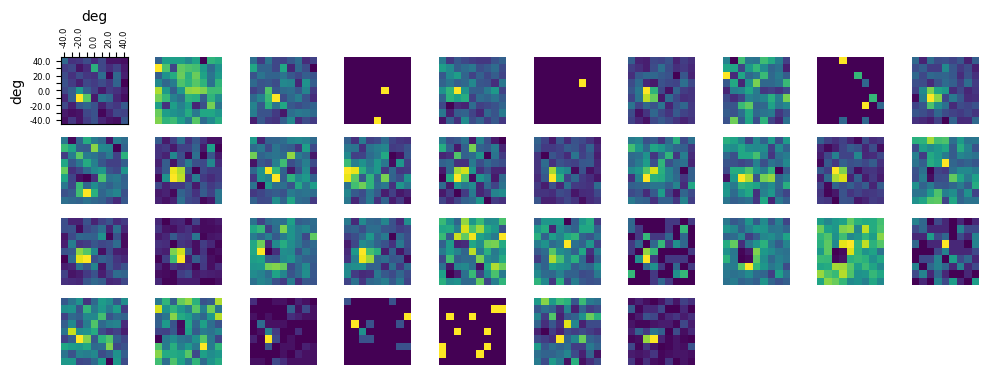

In [42]:
# display the receptive fields 
display_rfs(rfs)